### dependencies

**statsmodels**

### Min-max Scaling

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/Users/jaehwayang/DSL/EDA/sep/by_patient/p01.csv')

# 정규화
scale_cols = ["insulin", "carbs", "hr", "steps", "cals", "bg"]
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 저장
results = []

# lag 반복 (0~8 → 0~120분)
for lag in range(0, 9):
    df_lagged = df.copy()

    for col in ["insulin", "carbs", "hr", "steps", "cals"]:
        df_lagged[f"{col}_lag"] = df_lagged[col].shift(lag)

    df_lagged["delta_hr"] = df_lagged["hr"] - df_lagged["hr_lag"]
    df_lagged["insulin_x_carbs_lag"] = df_lagged["insulin_lag"] * df_lagged["carbs_lag"]
    df_lagged["delta_hr_x_steps_lag"] = df_lagged["delta_hr"] * df_lagged["steps_lag"]
    df_lagged["bg_diff"] = df_lagged["bg"].diff()

    predictors = ["insulin_lag", "carbs_lag", "delta_hr", "steps_lag", "cals_lag",
                  "insulin_x_carbs_lag", "delta_hr_x_steps_lag"]
    df_model = df_lagged[["bg_diff"] + predictors].dropna()
    if df_model.empty:
        continue

    X = sm.add_constant(df_model[predictors])
    y = df_model["bg_diff"]
    model = sm.OLS(y, X).fit()

    results.append({
        "lag_min": lag * 15,
        "R_squared": model.rsquared,
        "model_pval": model.f_pvalue,
        "insulin_coef": model.params.get("insulin_lag"),
        "insulin_pval": model.pvalues.get("insulin_lag"),
        "carbs_coef": model.params.get("carbs_lag"),
        "carbs_pval": model.pvalues.get("carbs_lag")
    })

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(results_df["lag_min"], results_df["insulin_coef"], marker='o', label='Insulin Coef')
plt.plot(results_df["lag_min"], results_df["carbs_coef"], marker='s', label='Carbs Coef')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Effect of Insulin and Carbs on ΔBG by Time Lag")
plt.xlabel("Time Lag (minutes)")
plt.ylabel("Regression Coefficient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 통계 요약 출력
print("\n=== Regression Summary Table ===\n")
print(results_df[["lag_min", "R_squared", "model_pval", 
                  "insulin_coef", "insulin_pval", 
                  "carbs_coef", "carbs_pval"]].round(4))


=== Regression Summary Table ===

   lag_min  R_squared  model_pval  insulin_coef  insulin_pval  carbs_coef  \
0        0     0.0104         0.0        0.0314        0.0001      0.0606   
1       15     0.0196         0.0       -0.0182        0.0208      0.0765   
2       30     0.0200         0.0       -0.0483        0.0000      0.0153   
3       45     0.0205         0.0       -0.0842        0.0000     -0.0170   
4       60     0.0237         0.0       -0.0637        0.0000     -0.0711   
5       75     0.0179         0.0       -0.0680        0.0000     -0.0676   
6       90     0.0134         0.0       -0.0465        0.0000     -0.0777   
7      105     0.0087         0.0       -0.0328        0.0000     -0.0232   
8      120     0.0062         0.0       -0.0056        0.4776     -0.0325   

   carbs_pval  
0      0.0001  
1      0.0000  
2      0.3110  
3      0.2607  
4      0.0000  
5      0.0000  
6      0.0000  
7      0.1259  
8      0.0327  


### Z-score Scaling

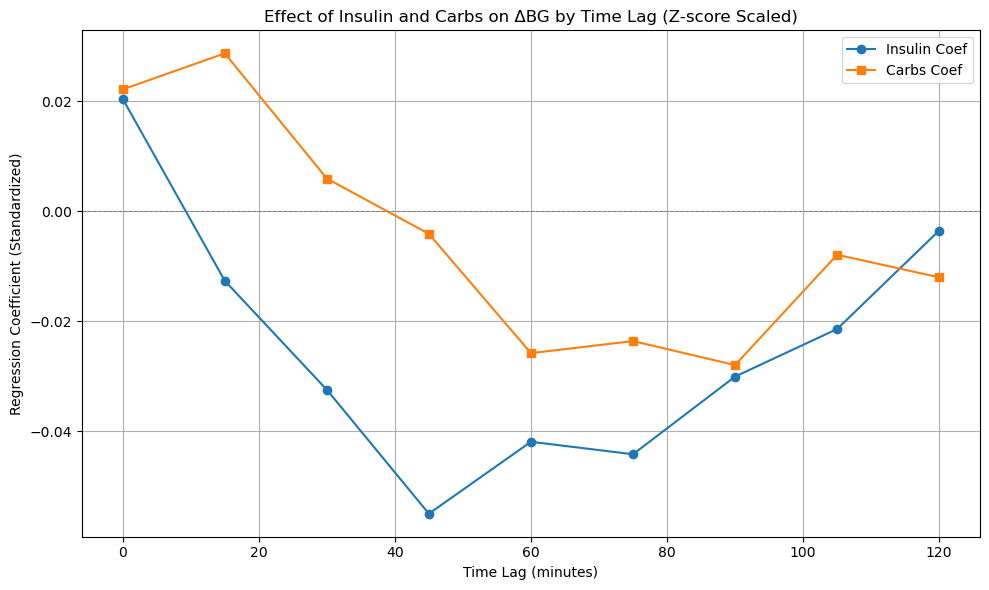


=== Regression Summary Table (Z-score Scaling) ===

   lag_min  R_squared  model_pval  insulin_coef  insulin_pval  carbs_coef  \
0        0     0.0104         0.0        0.0204        0.0001      0.0222   
1       15     0.0196         0.0       -0.0126        0.0144      0.0287   
2       30     0.0200         0.0       -0.0325        0.0000      0.0060   
3       45     0.0205         0.0       -0.0550        0.0000     -0.0041   
4       60     0.0237         0.0       -0.0419        0.0000     -0.0258   
5       75     0.0179         0.0       -0.0442        0.0000     -0.0236   
6       90     0.0134         0.0       -0.0301        0.0000     -0.0280   
7      105     0.0087         0.0       -0.0214        0.0000     -0.0079   
8      120     0.0062         0.0       -0.0035        0.5018     -0.0120   

   carbs_pval  
0      0.0001  
1      0.0000  
2      0.2829  
3      0.4595  
4      0.0000  
5      0.0000  
6      0.0000  
7      0.1568  
8      0.0316  


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/Users/jaehwayang/DSL/EDA/sep/by_patient/p01.csv')

# Z-score 정규화
scale_cols = ["insulin", "carbs", "hr", "steps", "cals", "bg"]
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 저장
results = []

# lag 반복 (0~8 → 0~120분)
for lag in range(0, 9):
    df_lagged = df.copy()

    for col in ["insulin", "carbs", "hr", "steps", "cals"]:
        df_lagged[f"{col}_lag"] = df_lagged[col].shift(lag)

    df_lagged["delta_hr"] = df_lagged["hr"] - df_lagged["hr_lag"]
    df_lagged["insulin_x_carbs_lag"] = df_lagged["insulin_lag"] * df_lagged["carbs_lag"]
    df_lagged["delta_hr_x_steps_lag"] = df_lagged["delta_hr"] * df_lagged["steps_lag"]
    df_lagged["bg_diff"] = df_lagged["bg"].diff()

    predictors = ["insulin_lag", "carbs_lag", "delta_hr", "steps_lag", "cals_lag",
                  "insulin_x_carbs_lag", "delta_hr_x_steps_lag"]
    df_model = df_lagged[["bg_diff"] + predictors].dropna()
    if df_model.empty:
        continue

    X = sm.add_constant(df_model[predictors])
    y = df_model["bg_diff"]
    model = sm.OLS(y, X).fit()

    results.append({
        "lag_min": lag * 15,
        "R_squared": model.rsquared,
        "model_pval": model.f_pvalue,
        "insulin_coef": model.params.get("insulin_lag"),
        "insulin_pval": model.pvalues.get("insulin_lag"),
        "carbs_coef": model.params.get("carbs_lag"),
        "carbs_pval": model.pvalues.get("carbs_lag")
    })

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(results_df["lag_min"], results_df["insulin_coef"], marker='o', label='Insulin Coef')
plt.plot(results_df["lag_min"], results_df["carbs_coef"], marker='s', label='Carbs Coef')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Effect of Insulin and Carbs on ΔBG by Time Lag (Z-score Scaled)")
plt.xlabel("Time Lag (minutes)")
plt.ylabel("Regression Coefficient (Standardized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 통계 요약 출력
print("\n=== Regression Summary Table (Z-score Scaling) ===\n")
print(results_df[["lag_min", "R_squared", "model_pval",
                  "insulin_coef", "insulin_pval",
                  "carbs_coef", "carbs_pval"]].round(4))

### Carbs 값이 있는 곳 앞뒤 120분씩만 활용

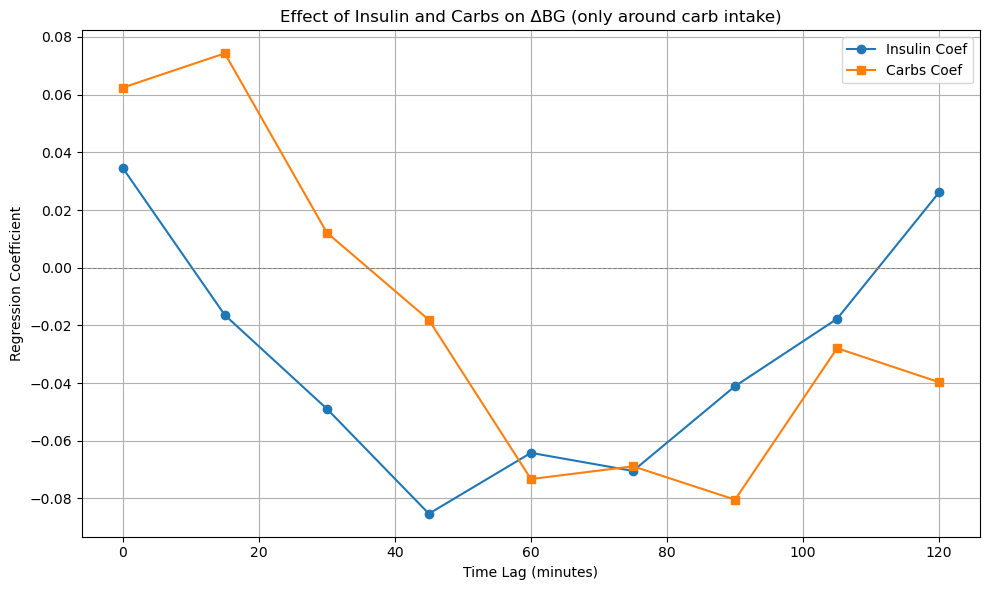


=== Regression Summary Table (carbs-centered ±120min) ===

   lag_min  R_squared  model_pval  insulin_coef  insulin_pval  carbs_coef  \
0        0     0.0105      0.0000        0.0346        0.0017      0.0624   
1       15     0.0205      0.0000       -0.0164        0.1340      0.0743   
2       30     0.0223      0.0000       -0.0489        0.0000      0.0122   
3       45     0.0215      0.0000       -0.0853        0.0000     -0.0181   
4       60     0.0232      0.0000       -0.0642        0.0000     -0.0733   
5       75     0.0189      0.0000       -0.0705        0.0000     -0.0689   
6       90     0.0137      0.0000       -0.0411        0.0002     -0.0804   
7      105     0.0058      0.0002       -0.0177        0.1085     -0.0279   
8      120     0.0055      0.0003        0.0261        0.0179     -0.0397   

   carbs_pval  
0      0.0019  
1      0.0002  
2      0.5423  
3      0.3646  
4      0.0002  
5      0.0006  
6      0.0001  
7      0.1654  
8      0.0486  


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/Users/jaehwayang/DSL/EDA/sep/by_patient/p01.csv')

# Min-Max Scaling
scale_cols = ["insulin", "carbs", "hr", "steps", "cals", "bg"]
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# carbs > 0인 시간 중심으로 앞뒤 120분씩 (1 row = 15분 → 8 rows씩 양옆)
rows_to_use = set()
for idx in df[df["carbs"] > 0].index:
    start = max(idx - 8, 0)
    end = min(idx + 8, len(df) - 1)
    rows_to_use.update(range(start, end + 1))

# 정렬 및 서브셋 생성
rows_to_use = sorted(rows_to_use)
df_subset = df.iloc[rows_to_use].copy()
df_subset.reset_index(drop=True, inplace=True)

# 결과 저장
results = []

# lag 0~8 (0~120분)
for lag in range(0, 9):
    df_lagged = df_subset.copy()

    for col in ["insulin", "carbs", "hr", "steps", "cals"]:
        df_lagged[f"{col}_lag"] = df_lagged[col].shift(lag)

    df_lagged["delta_hr"] = df_lagged["hr"] - df_lagged["hr_lag"]
    df_lagged["insulin_x_carbs_lag"] = df_lagged["insulin_lag"] * df_lagged["carbs_lag"]
    df_lagged["delta_hr_x_steps_lag"] = df_lagged["delta_hr"] * df_lagged["steps_lag"]
    df_lagged["bg_diff"] = df_lagged["bg"].diff()

    predictors = ["insulin_lag", "carbs_lag", "delta_hr", "steps_lag", "cals_lag",
                  "insulin_x_carbs_lag", "delta_hr_x_steps_lag"]
    df_model = df_lagged[["bg_diff"] + predictors].dropna()
    if df_model.empty:
        continue

    X = sm.add_constant(df_model[predictors])
    y = df_model["bg_diff"]
    model = sm.OLS(y, X).fit()

    results.append({
        "lag_min": lag * 15,
        "R_squared": model.rsquared,
        "model_pval": model.f_pvalue,
        "insulin_coef": model.params.get("insulin_lag"),
        "insulin_pval": model.pvalues.get("insulin_lag"),
        "carbs_coef": model.params.get("carbs_lag"),
        "carbs_pval": model.pvalues.get("carbs_lag")
    })

# 결과 테이블
results_df = pd.DataFrame(results)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(results_df["lag_min"], results_df["insulin_coef"], marker='o', label='Insulin Coef')
plt.plot(results_df["lag_min"], results_df["carbs_coef"], marker='s', label='Carbs Coef')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Effect of Insulin and Carbs on ΔBG (only around carb intake)")
plt.xlabel("Time Lag (minutes)")
plt.ylabel("Regression Coefficient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 출력
print("\n=== Regression Summary Table (carbs-centered ±120min) ===\n")
print(results_df.round(4))

### 각 변수 별로 최적 lag를 구한 뒤, 그 lag를 적용시켜 구한 회귀 결과

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
df = pd.read_csv('/Users/jaehwayang/DSL/EDA/sep/by_patient/p01.csv')

# 정규화
scale_cols = ["insulin", "carbs", "hr", "steps", "cals", "bg"]
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 최적 lag 지정
lags = {
    "insulin": 3,      # 45분
    "carbs": 1,        # 15분
    "steps": 1,        # 15분
    "cals": 2,         # 30분
    "hr": 3            # delta_hr at lag 45
}

# lagged 변수 생성
df_lagged = df.copy()
for var, lag in lags.items():
    df_lagged[f"{var}_lag"] = df_lagged[var].shift(lag)

# Δhr 계산
df_lagged["delta_hr"] = df_lagged["hr"] - df_lagged["hr_lag"]

# Δbg 계산
df_lagged["bg_diff"] = df_lagged["bg"].diff()

# interaction terms
df_lagged["insulin_x_carbs"] = df_lagged["insulin_lag"] * df_lagged["carbs_lag"]
df_lagged["delta_hr_x_steps"] = df_lagged["delta_hr"] * df_lagged["steps_lag"]

# 최종 모델 변수
predictors = ["insulin_lag", "carbs_lag", "delta_hr", "steps_lag", "cals_lag",
              "insulin_x_carbs", "delta_hr_x_steps"]

df_model = df_lagged[["bg_diff"] + predictors].dropna()
X = sm.add_constant(df_model[predictors])
y = df_model["bg_diff"]
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bg_diff   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     36.63
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           7.44e-51
Time:                        12:46:05   Log-Likelihood:                 13063.
No. Observations:                8456   AIC:                        -2.611e+04
Df Residuals:                    8448   BIC:                        -2.605e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0006      0.001  